In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/codestates/water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#결측치 처리
df_mean = df.fillna({'ph':df['ph'].mean(),'Sulfate':df['Sulfate'].mean(),'Trihalomethanes':df['Trihalomethanes'].mean()})

df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df_mean.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

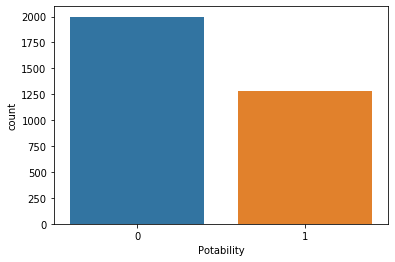

In [ ]:
tmp = df['Potability']
sns.countplot(x=tmp)

In [ ]:
df_mean.drop('Potability', axis=1).skew()

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
dtype: float64

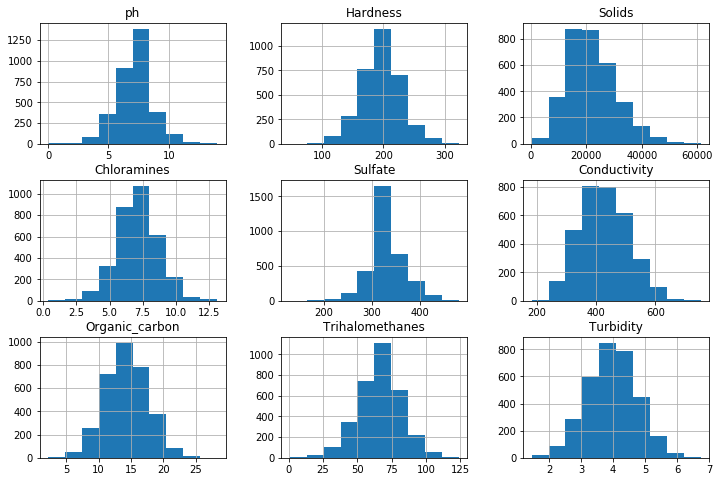

In [ ]:
df_mean.drop('Potability', axis=1).hist(figsize=(12,8));

In [ ]:
df_mean.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


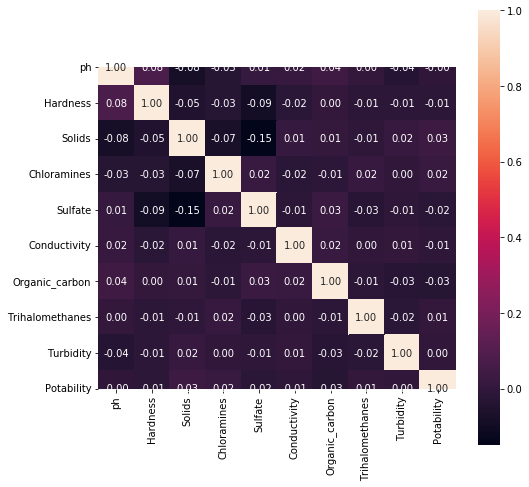

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df_mean.corr(), annot=True, fmt='0.2f', square=True)

In [ ]:
len(df)

3276

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['Potability'], random_state=2)


In [ ]:
target = 'Potability' 
features = df.columns.drop('Potability')

y_train = train[target]
X_train = train[features]


y_test = test[target]
X_test = test[features]

In [ ]:
from sklearn.metrics import classification_report
train2, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['Potability'], random_state=2)
y_val = val[target]
X_val = val[features]
y_train2 = train2[target]
X_train2 = train2[features]
major = tmp.mode()[0]
base = [major]*len(y_val)



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

LR = make_pipeline(
    SimpleImputer(),
    StandardScaler(),  
    LogisticRegression()
)

DT = make_pipeline(
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

RF = make_pipeline(
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

XGB = make_pipeline(
    SimpleImputer(),
    XGBClassifier(
    n_estimators=1000,
    objective='binary:logistic', 
    learning_rate=0.2,
    n_jobs=-1)
)

LR.fit(X_train2,y_train2)
DT.fit(X_train2,y_train2)
RF.fit(X_train2,y_train2)
XGB.fit(X_train2,y_train2)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(learning_rate=0.2, n_estimators=1000,
                               n_jobs=-1))])

In [ ]:
print(classification_report(y_val, base))
print(classification_report(y_val, LR.predict(X_val)))
print(classification_report(y_val, DT.predict(X_val)))
print(classification_report(y_val, RF.predict(X_val)))
print(classification_report(y_val, XGB.predict(X_val)))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       320
           1       0.00      0.00      0.00       204

    accuracy                           0.61       524
   macro avg       0.31      0.50      0.38       524
weighted avg       0.37      0.61      0.46       524

              precision    recall  f1-score   support

           0       0.61      0.99      0.76       320
           1       0.60      0.01      0.03       204

    accuracy                           0.61       524
   macro avg       0.61      0.50      0.39       524
weighted avg       0.61      0.61      0.47       524

              precision    recall  f1-score   support

           0       0.65      0.62      0.63       320
           1       0.44      0.48      0.46       204

    accuracy                           0.56       524
   macro avg       0.55      0.55      0.55       524
weighted avg       0.57      0.56      0.57       524

              preci

In [ ]:
# k=5
# LR_acc = cross_val_score(LR, X_train, y_train, cv=k, 
#                          scoring='accuracy')
# LR_acc = LR_acc.mean()
# DT_acc = cross_val_score(DT, X_train, y_train, cv=k, 
#                          scoring='accuracy')
# DT_acc = DT_acc.mean()
# RF_acc = cross_val_score(RF, X_train, y_train, cv=k, 
#                          scoring='accuracy')
# RF_acc = RF_acc.mean()

# LR_f1 = cross_val_score(LR, X_train, y_train, cv=k, 
#                          scoring='f1')
# LR_f1 = LR_f1.mean()
# DT_f1 = cross_val_score(DT, X_train, y_train, cv=k, 
#                          scoring='f1')
# DT_f1 = DT_f1.mean()
# RF_f1 = cross_val_score(RF, X_train, y_train, cv=k, 
#                          scoring='f1')

# RF_f1 = RF_f1.mean()


In [ ]:

# print("LogisticRegression acc: {0}, f1: {1}".format(LR_acc, LR_f1))
# print("DecisionTreeClassifier acc: {0}, f1: {1}".format(DT_acc, DT_f1))
# print("RandomForestClassifier acc: {0}, f1: {1}".format(RF_acc, RF_f1))

In [ ]:
RF.get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=10),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': -1,
 'randomforestclassifier__oob_score': True,
 'randomforestclassifier__random_state': 10,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False,
 'simpleimputer': SimpleImputer(),
 'simpleimputer_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
dists = {
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    RF, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
pipe = clf.best_estimator_
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       400
           1       0.62      0.35      0.45       256

    accuracy                           0.66       656
   macro avg       0.65      0.61      0.60       656
weighted avg       0.66      0.66      0.64       656



In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['randomforestclassifier'], 
    n_iter=5, 
    random_state=2
)

X_val_transformed = pipe.named_steps['simpleimputer'].transform(X_val)
permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Trihalomethanes    0.016794
Organic_carbon     0.017557
Turbidity          0.017939
Conductivity       0.022901
Solids             0.048855
Hardness           0.069847
Chloramines        0.069847
ph                 0.140840
Sulfate            0.150382
dtype: float64

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.1504 ± 0.0178,Sulfate
0.1408 ± 0.0197,ph
0.0698 ± 0.0052,Chloramines
0.0698 ± 0.0104,Hardness
0.0489 ± 0.0089,Solids
0.0229 ± 0.0080,Conductivity
0.0179 ± 0.0092,Turbidity
0.0176 ± 0.0095,Organic_carbon
0.0168 ± 0.0095,Trihalomethanes


In [ ]:
!pip install pdpbox

In [ ]:
X_val

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.057553,177.674305,13129.149842,7.312352,367.328533,393.740497,16.356320,53.841797,4.486403
1,4.229225,207.669229,21214.370515,6.844548,304.275125,488.455862,13.489424,65.307570,3.733140
2,6.604008,212.978467,23564.579663,6.608205,325.353860,430.332754,14.352905,33.403048,4.458967
3,8.153210,127.144892,10280.929497,5.828358,267.636886,487.908327,11.943477,90.619354,2.905788
4,8.575673,197.560283,15888.625207,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229
...,...,...,...,...,...,...,...,...,...
519,NaN,206.577843,40710.524386,8.813666,320.449328,468.051715,14.523500,71.450447,5.486132
520,8.054893,239.139779,28545.355433,5.096894,NaN,574.402828,17.778015,56.352953,3.524380
521,7.466213,223.184181,18261.694942,5.206597,NaN,456.262151,14.023547,99.130336,2.081846
522,3.148712,142.272084,23257.208834,8.279275,293.160800,391.841303,8.923594,68.316612,3.465638


In [ ]:
tmp1 = pd.DataFrame(X_val_transformed,columns=X_val.columns)
tmp1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.057553,177.674305,13129.149842,7.312352,367.328533,393.740497,16.356320,53.841797,4.486403
1,4.229225,207.669229,21214.370515,6.844548,304.275125,488.455862,13.489424,65.307570,3.733140
2,6.604008,212.978467,23564.579663,6.608205,325.353860,430.332754,14.352905,33.403048,4.458967
3,8.153210,127.144892,10280.929497,5.828358,267.636886,487.908327,11.943477,90.619354,2.905788
4,8.575673,197.560283,15888.625207,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229
...,...,...,...,...,...,...,...,...,...
519,7.082090,206.577843,40710.524386,8.813666,320.449328,468.051715,14.523500,71.450447,5.486132
520,8.054893,239.139779,28545.355433,5.096894,333.165971,574.402828,17.778015,56.352953,3.524380
521,7.466213,223.184181,18261.694942,5.206597,333.165971,456.262151,14.023547,99.130336,2.081846
522,3.148712,142.272084,23257.208834,8.279275,293.160800,391.841303,8.923594,68.316612,3.465638


(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f74907be9d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7413964cd0>})

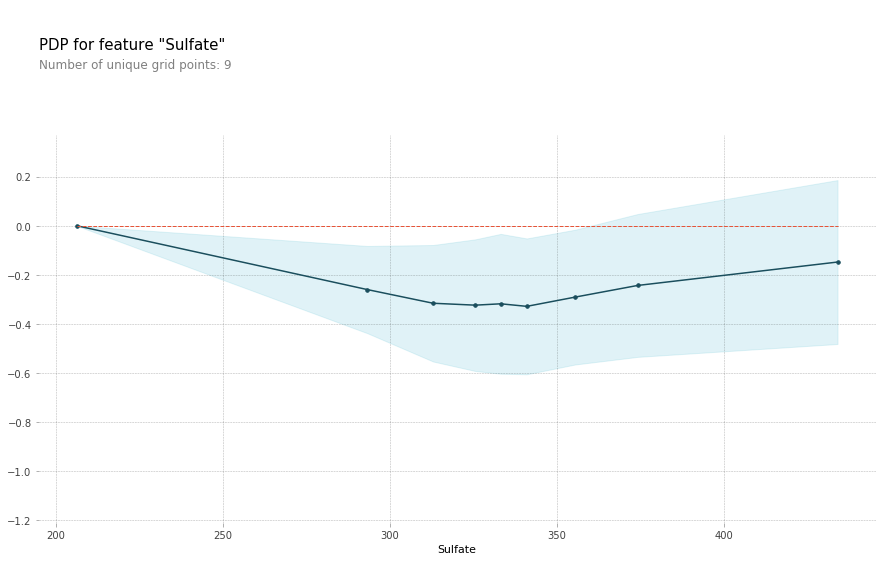

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'Sulfate'
isolated = pdp_isolate(
    model=pipe, 
    dataset=tmp1, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature)


(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7490770810>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7490726510>})

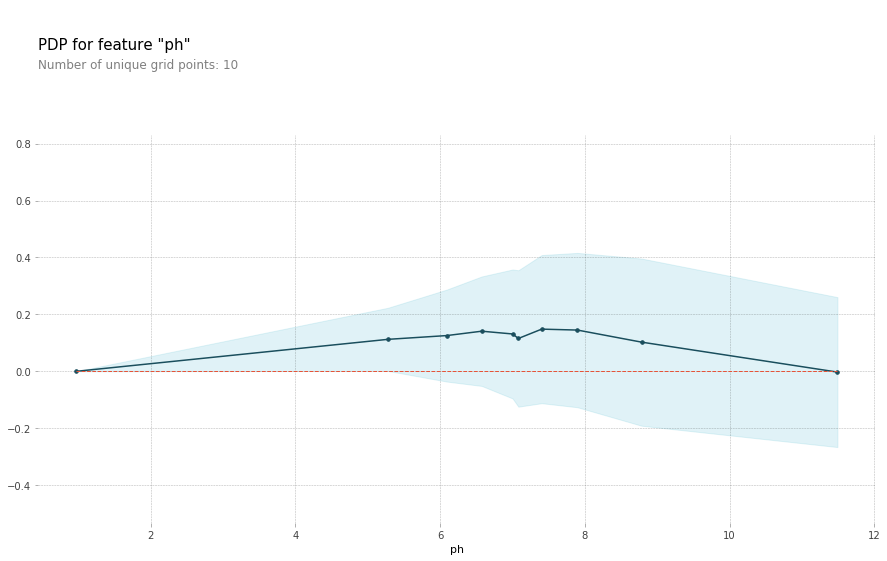

In [ ]:
feature = 'ph'
isolated = pdp_isolate(
    model=pipe, 
    dataset=tmp1, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)


In [ ]:
df['ph']

0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

In [ ]:
df[(df['Sulfate']<250)]['Potability'].value_counts()

1    40
0    18
Name: Potability, dtype: int64

In [ ]:
df[(df['ph']<4)]['Potability'].value_counts()

0    58
1    20
Name: Potability, dtype: int64

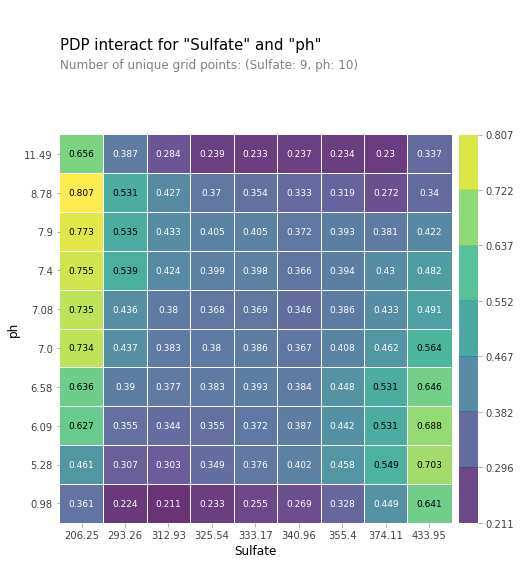

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['Sulfate', 'ph']

interaction = pdp_interact(
    model=pipe, 
    dataset=tmp1,
    model_features=X_val.columns, 
    features=features
)
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 2.0 MB/s 


In [ ]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1115,8.757111,185.419367,31040.884494,8.544764,NaN,408.095797,18.235220,72.299662,3.808793
2607,7.675914,233.300759,23673.100606,8.407497,NaN,232.613624,18.459408,60.993590,5.040461
153,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638
3016,6.255150,153.640493,24316.163340,8.211595,367.344534,295.042492,12.503661,91.270792,3.146483
1483,NaN,246.239763,6974.225135,9.812468,417.911837,355.532470,13.330091,68.388378,4.138697
...,...,...,...,...,...,...,...,...,...
1578,6.865569,231.445054,22585.788809,5.676387,NaN,496.603425,16.154964,91.461709,4.916218
1392,4.916741,191.467110,23425.331316,6.857583,NaN,316.422251,18.281754,43.433240,3.613212
1050,8.746986,148.393724,22174.781141,5.459172,369.369881,407.380825,15.892079,72.164019,4.763731
967,6.062738,224.841181,25842.581279,9.463391,NaN,385.391619,13.074750,85.351214,4.369455


In [ ]:
import shap
row = X_test.iloc[[300]]
model = pipe.named_steps['randomforestclassifier']
#print(model.predict(row))
explainer = shap.TreeExplainer(model)

row_processed = pipe.named_steps['simpleimputer'].transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0], 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [ ]:
print(len(shap_values))

2


In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[:100])

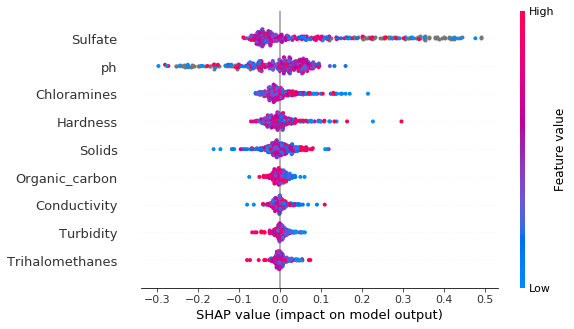

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values[1], X_test.iloc[:300])